In [12]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [13]:
#nltk.download('punkt')
#nltk.download('twitter_samples')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

In [14]:
# Load the twitter samples dataset
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
neu_tweets = twitter_samples.strings('tweets.20150430-223406.json')

In [15]:
# Combine all tweets into one list
tweets = pos_tweets + neg_tweets + neu_tweets

# Task 5.1

In [16]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    stems = [stemmer.stem(token) for token in tokens]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return stems, lemmas


In [18]:
# Preprocess the tweets
stemmed_tweets = []
lemmatized_tweets = []
for tweet in tweets:
    stems, lemmas = preprocess(tweet)
    stemmed_tweets.append(stems)
    lemmatized_tweets.append(lemmas)

# Task 5.2

In [19]:
def ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Task 5.3

In [35]:
# Define the n-gram sizes
n_grams = [1, 2, 3]

# Count the frequency of each n-gram in the preprocessed tweets
freq_stemmed = {}
freq_lemmatized = {}
for n in n_grams:
    freq_stemmed[n] = FreqDist(ngrams([token for tweet in stemmed_tweets for token in tweet], n))
    freq_lemmatized[n] = FreqDist(ngrams([token for tweet in lemmatized_tweets for token in tweet], n))

# Task 5.4

In [36]:
freq_stemmed1 = sorted(freq_stemmed)
freq_lemmatized1 = sorted(freq_lemmatized)

# Task 5.5

In [38]:
for n in n_grams:
    print(f'Top 10 most frequent {n}-grams (stemmed):')
    print(freq_stemmed[n].most_common(10))
    print(f'Top 10 most frequent {n}-grams (lemmatized):')
    print(freq_lemmatized[n].most_common(10))
    print()

Top 10 most frequent 1-grams (stemmed):
[((':',), 37120), (('@',), 30727), (('#',), 14870), (('.',), 14585), (('the',), 14476), (('rt',), 13563), (('to',), 9774), (('http',), 9680), ((',',), 9244), (('(',), 8378)]
Top 10 most frequent 1-grams (lemmatized):
[((':',), 37120), (('@',), 30727), (('#',), 14870), (('.',), 14585), (('the',), 14476), (('rt',), 13557), (('to',), 9774), (('http',), 9680), ((',',), 9244), (('a',), 9136)]

Top 10 most frequent 2-grams (stemmed):
[(('rt', '@'), 13315), (('http', ':'), 9680), ((':', '('), 4692), ((':', ')'), 3794), (('#', 'bbcqt'), 2614), (('ed', 'miliband'), 1916), (('(', '('), 1823), (('.', '#'), 1814), (('david', 'cameron'), 1653), (('(', '@'), 1596)]
Top 10 most frequent 2-grams (lemmatized):
[(('rt', '@'), 13315), (('http', ':'), 9680), ((':', '('), 4692), ((':', ')'), 3794), (('#', 'bbcqt'), 2614), (('ed', 'miliband'), 1916), (('(', '('), 1823), (('.', '#'), 1814), (('david', 'cameron'), 1653), (('(', '@'), 1596)]

Top 10 most frequent 3-grams

# Task 5.6

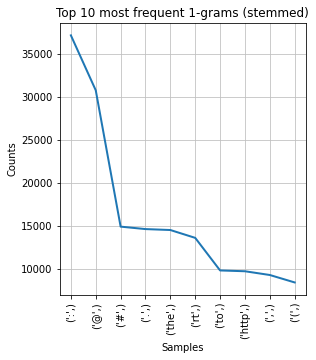

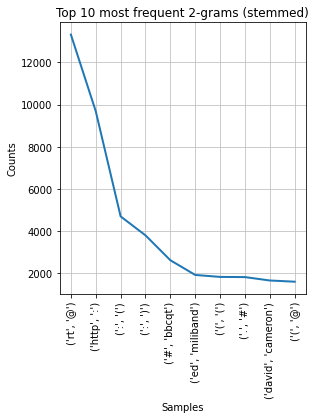

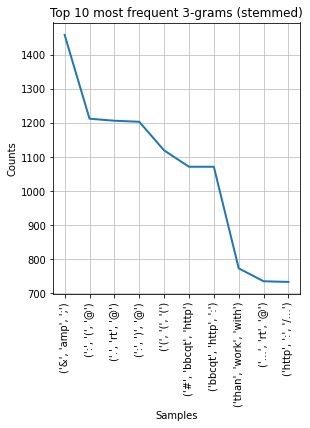

In [39]:
for n in n_grams:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,3)
    plt.title(f'Top 10 most frequent {n}-grams (stemmed)')
    freq_stemmed[n].plot(10)

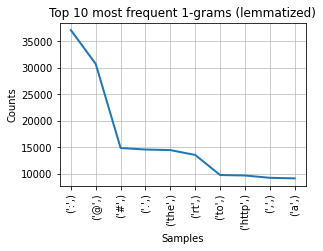

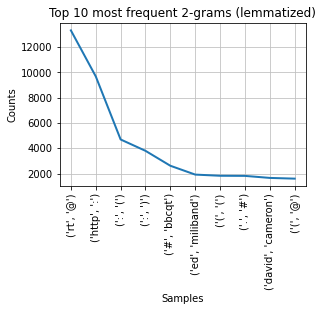

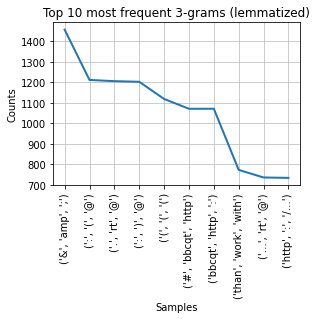

In [28]:
for n in n_grams:   
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,3)
    plt.title(f'Top 10 most frequent {n}-grams (lemmatized)')
    freq_lemmatized[n].plot(10)
    plt.show()